In [1]:
import numpy as np 
from numpy import random
import pandas as pd 
import seaborn as sns
import scipy 
from scipy.stats import chi2
import math
import sys
from scipy.stats import beta
from scipy.stats import invgamma
import matplotlib.pyplot as plt
#Module pour latex 
#from __future__ import unicode_literals
import matplotlib as mpl
#mpl.rcParams['text.usetex']=True
#mpl.rcParams['text.latex.unicode']=True
#Example plt.title(r"\ $\alpha$",  fontsize=16, color='r')

alpha= 0 || Prial  =  -0.49373101414019904
alpha= 1 || Prial  =  7.2154135992854505
alpha= 2 || Prial  =  12.730418446371214
alpha= 3 || Prial  =  15.7071843417462
alpha= 4 || Prial  =  17.039862584437167
alpha= 5 || Prial  =  17.567095513775932
alpha= 6 || Prial  =  17.74093012221564
alpha= 7 || Prial  =  17.76626038287699
alpha= 8 || Prial  =  17.731819749648622
alpha= 9 || Prial  =  17.67588549817642
alpha= 10 || Prial  =  17.614954678516522
alpha= 11 || Prial  =  17.55596932078585
alpha= 12 || Prial  =  17.501608156155463
alpha= 13 || Prial  =  17.452638629136533
alpha= 14 || Prial  =  17.40898913033492
alpha= 15 || Prial  =  17.370246151979547
alpha= 16 || Prial  =  17.335885298001415
alpha= 17 || Prial  =  17.305376285732528
alpha= 18 || Prial  =  17.27822753855783
alpha= 19 || Prial  =  17.254001876292865
alpha= 0 || Prial  =  -0.6877224778315492
alpha= 1 || Prial  =  9.176944774808007
alpha= 2 || Prial  =  13.86566709343665
alpha= 3 || Prial  =  14.894199308559402
alpha= 4 || P

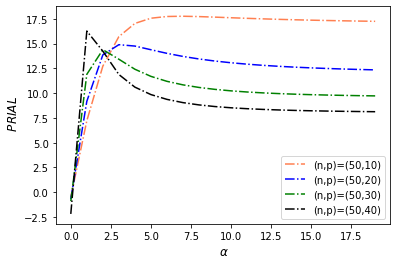

In [12]:
# Estimateur de Haff, alpha >0, cout de Stein, cas gaussien et stuend, differentes structure de Sigma et approche unifee

alpha_vec=np.arange(0, 20) #np.ones(20)     #   # alpha=1


Prial_K_a_Quad=np.zeros((4,alpha_vec.size)) # quand alpha=1 Prial_K_a_Quad est un scalaire
for boucle in range(1,5):
  np.random.seed(123)

  p = boucle*10;
  m= 50;  #m=n
  N=   200
  v=min(p,m) # v=p
  k=max(p,m)  #k=m=n



  t_K_Quad_loss =2*(v-1) / (k-v+1)   #(2*(v-1) / (k-v+1)  # t_K_Quad_loss=t_1= 2(p-1)/n optimal

 #------------Structure de Sigma-----------
  "-------------Identity----------------------"
  Sigma=np.identity(p)

  "------------Random--------------------"
  #e =p*np.random.rand(p,p)
  #Sigma= np.dot(e.T,e)
  "-----------Block----------------------"
  #gamma=1.9
  #sigma=np.zeros(p)
  #for i in range(0,p):
  #    sigma[p-1-i]=gamma**i
  #Sigma=np.diag(sigma)
  "----------AR-----------------------"
  #Sigma= np.zeros((p,p))
  #rho=0.9

  #for ii in range(0,p):
  #    for jj in range(0,p):
  #        Sigma[ii,jj] = rho**abs(ii-jj)
  "--------------------real-------------------"
  #Sigma=np.loadtxt('/sigma_50.txt')
  "-----------------------------------------"

  #w, V = np.linalg.eig(Sigma)
  #Sigma=np.diag(w)
  Sigma_inv=np.linalg.inv(Sigma)

  for r in range(0,np.size(alpha_vec)):
      np.random.seed(100)
      Loss_Sigma_a_Quad = 0
      Loss_Sigma_K_Quad = 0 
      for j in range(0,N): 
          '--- Gaussian case ---'
          U=np.random.multivariate_normal(np.zeros(p), Sigma,m)
          a_Quad_loss = 1 / (k) 
          K_star=1
          #"-----------------------------------------"
          
          '--- Student case ---'
          #ddl=5
          #IG = 1/np.random.gamma(ddl/2,2/ddl, p)
          #Z=np.tile(np.power(IG,.5),(m, 1))
          #X=np.random.multivariate_normal(np.zeros(p), Sigma, m)
          #U= np.multiply(X,Z)
          #K_star =(ddl/2)/( (ddl/2)-1 )
          
          #a_Quad_loss=1/(K_star*k)
          "-----------------------------------------"
          
          '--- Mixture of Beta ---'
          #alpha= .1 #alpha > p\2
          #Beta=  10   #beta > 0
          #R=np.sqrt(np.random.beta(alpha, Beta, p));
          #Z=np.tile(R,(m, 1))
          #X=np.random.multivariate_normal(np.zeros(p), Sigma, m)
          #U= np.multiply(X,Z)
          #K_st=beta.moment(1, alpha, Beta, loc=0, scale=1)
          #a_Quad_loss = 1 / (K_st*k) 
          
          "-----------------------------------------"
          S = np.dot(U.T,U) 
          S_plus = np.linalg.pinv(S) 
          trace_S_plus = np.matrix.trace(S_plus) 
          mu = 1/ trace_S_plus
          [R,V,D] = np.linalg.svd(U)                   # SVD pour U=R'VD afin de construire S= H L_tilde H^T
          #val_propre_S = V*V.T
          L = np.diag(V*V ) # Recuperer L
          H1 = D.T[:,0:v]
          
          
          Sigma_hat_a_Quad_loss  =   a_Quad_loss *S   #sigma_a optimal
          L_inv_p=(1/np.diag(L**alpha_vec[r]))*np.identity(v)
          trace_S_plus_p=np.matrix.trace(L_inv_p)

          #Phi_K_Quad = L + (beta/ (k*(1+beta)*trace_S_plus))*L_inv
          #gamma=8/(k-v+1)

          Psi_K_Quad = np.identity(v) + (t_K_Quad_loss/trace_S_plus_p)*L_inv_p

          Sigma_hat_K =  a_Quad_loss  *( H1@L@Psi_K_Quad@H1.T) # Estimateur de Konno

          valeurs,vecteurs = np.linalg.eig(Sigma_hat_K@Sigma_inv)
          determ = 0
          for vp in valeurs:
            if vp>0.00001:
              determ = determ + np.log(vp)
          #Loss_Sigma_K_Quad= Loss_Sigma_K_Quad + np.matrix.trace(Sigma_hat_K@Sigma_inv) - np.log(np.linalg.det(Sigma_hat_K@Sigma_inv))-v
          Loss_Sigma_K_Quad= Loss_Sigma_K_Quad + np.matrix.trace(Sigma_hat_K@Sigma_inv) - determ-v
          Risk_Sigma_K_Quad=(1/N)*(Loss_Sigma_K_Quad)

          valeurs,vecteurs = np.linalg.eig(Sigma_hat_a_Quad_loss@Sigma_inv)
          determ = 0
          for vp in valeurs:
            if vp>0.00001:
              determ = determ + np.log(vp)
          #Loss_Sigma_a_Quad = Loss_Sigma_a_Quad + np.matrix.trace(Sigma_hat_a_Quad_loss@Sigma_inv) - np.log(np.linalg.det(Sigma_hat_a_Quad_loss@Sigma_inv))-v
          Loss_Sigma_a_Quad = Loss_Sigma_a_Quad + np.matrix.trace(Sigma_hat_a_Quad_loss@Sigma_inv) - determ-v
          Risk_Sigma_a_Quad=(1/N)*(Loss_Sigma_a_Quad)

      Prial_K_a_Quad[boucle-1][r] = 100*( (Risk_Sigma_a_Quad - Risk_Sigma_K_Quad   ) / Risk_Sigma_a_Quad)
      print('alpha=',alpha_vec[r],"||",'Prial  = ',Prial_K_a_Quad[boucle-1][r])
    
#plt.figure(figsize=(4,3.3))

plt.plot(alpha_vec,Prial_K_a_Quad[0],'-.',color='coral',label='(n,p)=(50,10)')
plt.plot(alpha_vec,Prial_K_a_Quad[1],'-.',color='blue',label='(n,p)=(50,20)')
plt.plot(alpha_vec,Prial_K_a_Quad[2],'-.',color='green',label='(n,p)=(50,30)')
plt.plot(alpha_vec,Prial_K_a_Quad[3],'-.',color='black',label='(n,p)=(50,40)')


#print('max Prial=', np.max(Prial_K_a_Quad),"the best alpha=",alpha_vec[np.argmax(Prial_K_a_Quad)])
#plt.title('Real data')
plt.xlabel(r" $\alpha$",fontsize=12)
plt.ylabel(r" $PRIAL$",fontsize=12)
plt.legend()
plt.savefig('/inv_identity_p<n.pdf')
#plt.figure()
